In [23]:
import goal_updates
from search import Rule
import world
import os
import pddl_functions
import prob_model
import numpy as np
import configparser

In [24]:
def get_kde_config(config_name):
    model_config = configparser.ConfigParser()
    model_config.read('config/kde.ini')
    model_config = model_config[config_name]
    config_dict = {}
    config_dict['use_3d'] = model_config.getboolean('use_3d')
    config_dict['fix_bw'] = model_config.getboolean('fix_bw')
    config_dict['bw'] = model_config.getfloat('bw')
    config_dict['norm'] = model_config.getfloat('norm')
    return config_dict

In [13]:
c1 = 'C1'
c2 = 'C2'
c3 = 'C3'

rule1 = goal_updates.create_goal([c3], [c2])
rule2 = goal_updates.create_goal([c3], [c1], ['?y', '?x'])

data = w.sense().colours

In [9]:
problem_dir = 'onerule'
problems = list(os.listdir('tworules'))

w = world.PDDLWorld('blocks-domain.pddl', '{}/{}'.format(problem_dir, problems[0]))
# teacher = TeacherAgent()
# agent = agents.CorrectingAgent(w, teacher=teacher, update_negative=False, 
#                                colour_model_type='kde', model_config=get_kde_config('fixed_bw'))

Parsing domain blocks-domain.pddl
Parsing problem onerule/problem1.pddl


In [12]:
for obj in pddl_functions.filter_tower_locations(observation.objects, get_locations=False):
    data = observation.colours[obj]
    p_colour = model.p(1, data)

In [27]:
c3_model = prob_model.KDEColourModel(c3, data=np.array([data['b3']]), weights=np.array([1]), **get_kde_config('fixed_bw'))

In [30]:
class ActiveLearningTest(object):
    
    def __init__(self, rule1, rule2, data, c3_model, c2_obj):
        self.rule1 = Rule(rule1)
        self.rule2 = Rule(rule2)
        results = {}

        for obj in pddl_functions.filter_tower_locations(data.keys(), get_locations=False):
            datum = data[obj]
            p_colour = c3_model.p(1, datum)
            results[obj] = p_colour
        
        least_likely_obj = min(results, key=results.get)
        
        self.test_formula = pddl_functions.create_formula('on', [c2_obj, least_likely_obj])
                

test = ActiveLearningTest(rule1, rule2, data, c3_model, 'b2')
test.test_formula.asPDDL()

'(on b2 b5)'

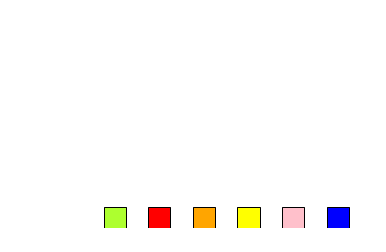

In [31]:
w.draw()